# Image Denoising Filters

Convolution is nothing but multiplication of two arrays of different sizes. In image processing context, the process of multiplication of kernels with the image is called **convolution**. The image will be of one size and the kernel with be of a different size, usually much smaller than image. The convolution is performed by sliding the kernel over the image,usually from top left of image.

A kernel is simply a matrix with which the image array is multiplied element wise using a sliding window operation. Most commonly used size for a kernel is 3 x 3 or 5 x 5. 

For example lets look at **Gasussian Kernel:**

| 1/16 | 1/8 | 1/16 |
|:----:|:---:|:----:|
|  1/8 | 1/4 |  1/8 |
| 1/16 | 1/8 | 1/16 |

Observe that the value in the center of this kernel is the largest i.e., more weightage is given to the central pixel and as you move away from the center weight reduces. Sounds exactly like a Normal distribution, isn't it !! Also notice that all the vlaues in the kernel add upto 1 like the area of a Normal curve.

It is also called *Normalized Box Filter*

[[0.00026475 0.00140172 0.00381028 0.00531767 0.00381028 0.00140172
  0.00026475]
 [0.00140172 0.00742141 0.02017349 0.02815437 0.02017349 0.00742141
  0.00140172]
 [0.00381028 0.02017349 0.05483722 0.07653151 0.05483722 0.02017349
  0.00381028]
 [0.00531767 0.02815437 0.07653151 0.10680833 0.07653151 0.02815437
  0.00531767]
 [0.00381028 0.02017349 0.05483722 0.07653151 0.05483722 0.02017349
  0.00381028]
 [0.00140172 0.00742141 0.02017349 0.02815437 0.02017349 0.00742141
  0.00140172]
 [0.00026475 0.00140172 0.00381028 0.00531767 0.00381028 0.00140172
  0.00026475]]


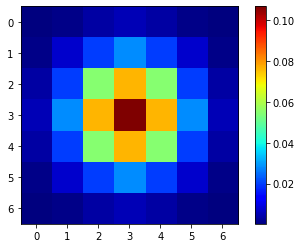

In [1]:
### What is gaussian Kernel #####
import numpy 
from matplotlib import pyplot as plt

def gaussian_kernel(size, size_y=None):
    size = int(size)
    if not size_y:
        size_y = size
    else:
        size_y = int(size_y)
    x, y = numpy.mgrid[-size:size+1, -size_y:size_y+1]
    g = numpy.exp(-(x**2/float(size)+y**2/float(size_y)))
    return g / g.sum()
 

gaussian_kernel_array = gaussian_kernel(3)
print(gaussian_kernel_array)
plt.imshow(gaussian_kernel_array, cmap=plt.get_cmap('jet'), interpolation='nearest')
plt.colorbar()
plt.show()

**Filters** work by convolution with a moving window called a kernel.

Local filters such as Gausssian filter,Median filter replace the value of pixels by a function of the values of neighboring pixels. For example, Medain filter replaces the center pixels by the median of all the neighboring pixels in a kernel. We always define a kernel whenever we are applying a filter. 


There are two types of filters: Linear filters and non-linear filters.

Gaussian is an example of linear filter. Non-linear filters preserve edges i.e., we do not loose the pixels at edges while performing non-linear filtering. Median filter is an example of non-linear filter. 

In [2]:
import cv2
import numpy as np
from scipy.signal import convolve2d
from scipy.ndimage.filters import convolve
from skimage import io, img_as_float

In [3]:
img_gaussian_noise = img_as_float(io.imread('images/BSE_25sigma_noisy.jpg', as_gray=True))
img_salt_pepper_noise = img_as_float(io.imread('images/BSE_salt_pepper.jpg', as_gray=True))

img = img_salt_pepper_noise

In [4]:
#kernel and applying it as a filter (or convolution) separately. 
kernel = np.ones((5,5),np.float32)/25    #Averaging filter with 5x5 kernel
#Normalize by dividing with 25 so all numbers add to 1
gaussian_kernel = np.array([[1/16, 1/8, 1/16],   #3x3 kernel
                [1/8, 1/4, 1/8],
                [1/16, 1/8, 1/16]])

During convolution the pixels at the edges are lost because they were never replaced by any values since they never fall in the center when the kernel window is slided over the image. However you can use *padding* to retain pixels at the edges.

We can also directly apply the convolution rather than defining.

`cv2.filter2D` - https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html?highlight=filter2d#filter2d

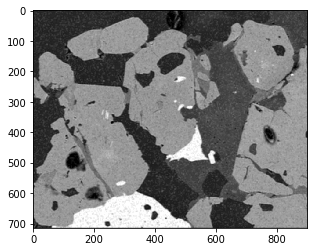

In [9]:
conv_using_cv2 = cv2.filter2D(img, -1, kernel, borderType=cv2.BORDER_CONSTANT) 


# cv2.imshow("Original", img)
# cv2.imshow("cv2 filter", conv_using_cv2)
# cv2.imshow("Using scipy", conv_using_scipy)
# cv2.imshow("Using scipy2", conv_using_scipy2)

# cv2.waitKey(0)          
# cv2.destroyAllWindows() 


plt.imshow(conv_using_cv2,cmap = 'gray')

- when `ddepth=-1`, the output image will have the same depth as the source. For,example, if input is float64 then output will also be `float64`

- `BORDER_CONSTANT` : Pad the image with a constant value (i.e. black or 0)

- `BORDER_REPLICATE`: The row or column at the very edge of the original is replicated to the extra border.

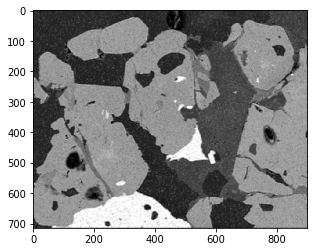

In [11]:
conv_using_scipy = convolve2d(img, kernel, mode='same')
#mode ="same" - pads image so the output is same as input

plt.imshow(conv_using_scipy,cmap = 'gray')

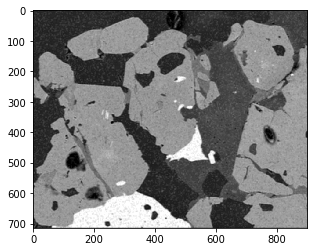

In [12]:
conv_using_scipy2 = convolve(img, kernel, mode='constant', cval=0.0)
#mode=constant adds a constant value at the borders. 

plt.imshow(conv_using_scipy2,cmap = 'gray')

---

# Gaussian Denoising

`skimage.filters.gaussian` - https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.gaussian

`cv2.filter2D` - https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html?highlight=filter2d#filter2d


`cv2.GaussianBlur` - https://www.tutorialkart.com/opencv/python/opencv-python-gaussian-image-smoothing/

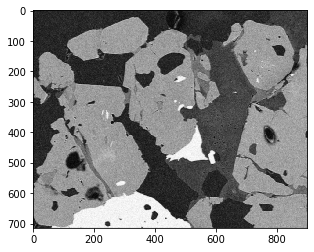

In [5]:
import cv2
import numpy as np
from skimage import io, img_as_float
from skimage.filters import gaussian
import matplotlib.pyplot as plt
from scipy import ndimage as nd

img_gaussian_noise = img_as_float(io.imread('images/BSE_25sigma_noisy.jpg', as_gray=True))
img_salt_pepper_noise = img_as_float(io.imread('images/BSE_salt_pepper.jpg', as_gray=True))

img = img_gaussian_noise

gaussian_using_cv2 = cv2.GaussianBlur(img, (3,3), 0, borderType=cv2.BORDER_CONSTANT)

gaussian_using_skimage = gaussian(img, sigma=1, mode='constant', cval=0.0)
#sigma defines the std dev of the gaussian kernel. SLightly different than how we define in cv2

gaussian_using_skimage2 = nd.gaussian_filter(img,sigma=3)

# cv2.imshow("Original", img)
# cv2.imshow("cv2 filter", conv_using_cv2)
# cv2.imshow("Using cv2 gaussian", gaussian_using_cv2)
# cv2.imshow("Using skimage", gaussian_using_skimage)
# #cv2.imshow("Using scipy2", conv_using_scipy2)

# cv2.waitKey(0)          
# cv2.destroyAllWindows() 

plt.imshow(gaussian_using_skimage,cmap='gray')

---

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('images/BSE_Google_noisy.jpg', 1)
kernel = np.ones((5,5),np.float32)/25
filt_2D = cv2.filter2D(img,-1,kernel)    #Convolution using the kernel we provide
blur = cv2.blur(img,(5,5))   #Convolution with a normalized filter. Same as above for this example.
blur_gaussian = cv2.GaussianBlur(img,(5,5),0)  #Gaussian kernel is used. 

---

# Median Denoising

In this method, the central pixel during convolution is assigned the median of all the pixel values inside the kernel (i.e., within the kernel size) as the sliding window moves along the image. Note that the values of remaining pixels remains the same, thus median filter retains the edges.

`cv2.medianBlur` -
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html
`skimage.filters.median` - https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.median

See how median is much better at cleaning salt and pepper noise compared to Gaussian

In [ ]:
import cv2
import numpy as np
from scipy import ndimage
from skimage import io
from skimage.filters import median

#img = io.imread('images/einstein.jpg', as_gray=True)

#Needs 8 bit, not float.
img_gaussian_noise = cv2.imread('images/BSE_25sigma_noisy.jpg', 0)
img_salt_pepper_noise = cv2.imread('images/BSE_salt_pepper.jpg', 0)

img = img_salt_pepper_noise


median_using_cv2 = cv2.medianBlur(img, 3)

median_using_skimage = ndimage.median_filter(img,3)

from skimage.morphology import disk
median_using_skimage2 = median(img, disk(3), mode='constant', cval=0.0)


# cv2.imshow("Original", img)
# cv2.imshow("cv2 median", median_using_cv2)
# cv2.imshow("Using skimage median", median_using_skimage)
# cv2.imshow("Using skimage median", median_using_skimage2)

# cv2.waitKey(0)          
# cv2.destroyAllWindows() 

---

# Bilateral Denoising

- It is another edge preserving denoising filter.

- Replace each pixel value with a weighted average of nearby pixel values, but takes into account the variation of intensities to preserve edges. 

- Bilateral is slow and not very efficient at salt and pepper

`cv2.bilateralFilter` - https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html

`skimage bilateral` - https://scikit-image.org/docs/dev/auto_examples/filters/plot_denoise.html

https://people.csail.mit.edu/sparis/bf_course/course_notes.pdf

In [6]:
import cv2
import numpy as np
from scipy.ndimage.filters import convolve
from skimage import io
from skimage.filters import median


img_gaussian_noise = cv2.imread('images/BSE_25sigma_noisy.jpg', 0)
img_salt_pepper_noise = cv2.imread('images/BSE_salt_pepper.jpg', 0)

img = img_salt_pepper_noise

bilateral_using_cv2 = cv2.bilateralFilter(img, 5, 20, 100, borderType=cv2.BORDER_CONSTANT)

#d - diameter of each pixel neighborhood used during filtering
# sigmaColor - Sigma of grey/color space. 
#sigmaSpace - Large value means farther pixels influence each other (as long as the colors are close enough)


from skimage.restoration import denoise_bilateral
bilateral_using_skimage = denoise_bilateral(img, sigma_color=0.05, sigma_spatial=15,
                multichannel=False)

#sigma_color = float - Sigma for grey or color value. 
#For large sigma_color values the filter becomes closer to gaussian blur.
#sigma_spatial: float. Standard ev. for range distance. Increasing this smooths larger features.


# cv2.imshow("Original", img)
# cv2.imshow("cv2 bilateral", bilateral_using_cv2)
# cv2.imshow("Using skimage bilateral", bilateral_using_skimage)

# cv2.waitKey(0)          
# cv2.destroyAllWindows() 

---

# NLM: Non Local Means Denoising

The non-local means algorithm replaces the value of a pixel by an average of a selection of other pixels values: small patches centered on the other pixels are compared to the patch centered on the pixel of interest, and the average is performed only for pixels that have patches close to the current patch. 

- Looks for the means of all pixels and not only the kernel region.

- estimated value is the weighted averaeg of all pixels in the image but..the family of weights depend on the similarity between the pixels p and j (say). In other words, similar pixels neighborhoods gives larger weights.

  https://scikit-image.org/docs/dev/auto_examples/filters/plot_nonlocal_means.html

- Works well for random gaussian noise but not as good for salt and pepper
https://www.iro.umontreal.ca/~mignotte/IFT6150/Articles/Buades-NonLocal.pdf

**It is important to convert image into float for NLM**

In [7]:
import cv2
import numpy as np
from skimage import io, img_as_float
from skimage.restoration import denoise_nl_means, estimate_sigma

img_gaussian_noise = img_as_float(io.imread('images/BSE_25sigma_noisy.jpg', as_gray=True))
img_salt_pepper_noise = img_as_float(io.imread('images/BSE_salt_pepper.jpg', as_gray=True))

img = img_gaussian_noise

sigma_est = np.mean(estimate_sigma(img, multichannel=True))
#sigma_est = 0.1

denoise_img = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=True,
                               patch_size=5, patch_distance=3, multichannel=False)

"""
When the fast_mode argument is False, a spatial Gaussian weighting is applied 
to the patches when computing patch distances. When fast_mode is True a 
faster algorithm employing uniform spatial weighting on the patches is applied.

Larger h allows more smoothing between disimilar patches.

"""

#denoise_img_as_8byte = img_as_ubyte(denoise_img)



## cv2.imshow("Original", img)
## cv2.imshow("NLM Filtered", denoise_img)
## cv2.waitKey(0)          
## cv2.destroyAllWindows() 

'\nWhen the fast_mode argument is False, a spatial Gaussian weighting is applied \nto the patches when computing patch distances. When fast_mode is True a \nfaster algorithm employing uniform spatial weighting on the patches is applied.\n\nLarger h allows more smoothing between disimilar patches.\n\n'

---

# Total Variation (TV) Denoising

- Signals with excessive spurious details have high total variation.

- It reduces the total variation of the signal, removes unwanted detail while preserving important details such as edges.

- Works well for random gaussian noise but not as good for salt and pepper

  https://hal.archives-ouvertes.fr/hal-00437581/document

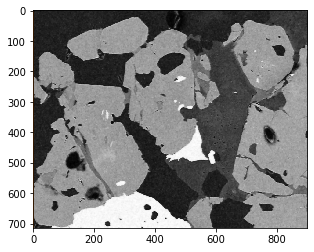

In [5]:
import cv2
import numpy as np
from skimage import io, img_as_float
from skimage.restoration import denoise_tv_chambolle
from matplotlib import pyplot as plt

img = img_as_float(io.imread('images/BSE_25sigma_noisy.jpg', as_gray=True))


plt.hist(img.flat, bins=100, range=(0,1))  #.flat returns the flattened numpy array (1D)


denoise_img = denoise_tv_chambolle(img, weight=0.1, eps=0.0002, n_iter_max=200, multichannel=False)

"""
denoise_tv_chambolle(image, weight=0.1, eps=0.0002, n_iter_max=200, multichannel=False)
weight: The greater weight, the more denoising (at the expense of fidelity to input).
eps: Relative difference of the value of the cost function that determines the stop criterion. 
n_iter_max: Max number of iterations used for optimization

"""


plt.hist(denoise_img.flat, bins=100, range=(0,1))  #.flat returns the flattened numpy array (1D)
plt.imshow(denoise_img,cmap='gray')

# cv2.imshow("Original", img)
# cv2.imshow("TV Filtered", denoise_img)
# cv2.waitKey(0)          
# cv2.destroyAllWindows() 

---

# Block Matching and 3D filtering (BM3D)

- Latest topic (i guess 2019) still emerging

- Uses CNN

- Collaborative Filtering process

    - Group of similar blocks extracted from the image

    - A block is grouped if it's dissimilarity with a reference fragement falls below a specified threshold-block matching.
    
    - All blocks in a group are then stacked together to form 3D cylinder like shape.
    
    - Filtering is done on every block group. Linear transform is applied followed by Weiner filtering, then transform is inverted to reproduce all filtered blocks.
    
    - Image transformed back to it's 2D form.
    
 http://www.cs.tut.fi/~foi/papers/ICIP2019_Ymir.pdf
 
bm3d library is not well documented yet, but looking into source code....

`sigma_psd` - noise standard deviation

`stage_arg:` Determines whether to perform hard-thresholding or Wiener filtering.

`stage_arg =` BM3DStages.HARD_THRESHOLDING or BM3DStages.ALL_STAGES (slow but powerful)

All stages performs both hard thresholding and Wiener filtering. 

In [1]:
#pip install bm3d


import matplotlib.pyplot as plt
from skimage import io, img_as_float
from skimage.metrics import peak_signal_noise_ratio
import bm3d
import cv2

noisy_img = img_as_float(io.imread("images/BSE_25sigma_noisy.jpg", as_gray=True))

BM3D_denoised_image = bm3d.bm3d(noisy_img, sigma_psd=0.2, stage_arg=bm3d.BM3DStages.HARD_THRESHOLDING)

"""
sigma_psd - noise standard deviation
stage_arg: Determines whether to perform hard-thresholding or Wiener filtering.
stage_arg = BM3DStages.HARD_THRESHOLDING or BM3DStages.ALL_STAGES (slow but powerful)
All stages performs both hard thresholding and Wiener filtering. 
"""

plt.imshow(BM3D_denoised_image,cmap='gray')

# cv2.imshow("Original", noisy_img)
# cv2.imshow("Denoised", BM3D_denoised_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

Exception: OpenBLAS library not found!

---

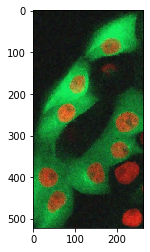

In [2]:
############################ Denoising filters ###############
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage import img_as_ubyte, img_as_float
from matplotlib import pyplot as plt
from skimage import io
import numpy as np

img = img_as_float(io.imread("images/denoising/noisy_img.jpg"))
#Need to convert to float as we will be doing math on the array

from scipy import ndimage as nd
gaussian_img = nd.gaussian_filter(img, sigma=3)
plt.imsave("images/gaussian.jpg", gaussian_img)


median_img = nd.median_filter(img, size=3)
plt.imsave("images/median.jpg", median_img)

gaussian_img = nd.gaussian_filter(img, sigma=3)
plt.imsave("images/gaussian.jpg", gaussian_img)


##### NLM#####

sigma_est = np.mean(estimate_sigma(img, multichannel=True))

patch_kw = dict(patch_size=5,      
                patch_distance=3,  
                multichannel=True)

denoise_img = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=False,
                               patch_size=5, patch_distance=3, multichannel=True)
"""
denoise_img = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=False,
                           **patch_kw)
"""
denoise_img_as_8byte = img_as_ubyte(denoise_img)

plt.imshow(denoise_img)
#plt.imshow(denoise_img_as_8byte, cmap=plt.cm.gray, interpolation='nearest')
plt.imsave("images/NLM.jpg",denoise_img)